In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Section 1.1
def pol_regression(features_train, y_train, degree):
    '''args: given as 1D numpy arrays
    
        features_train: input x in dataset
        y_train : output y in dataset
        degree : degree of polynomial
    '''   
    #Gets Polynimial Data Matrix from helper function
    parameters = DataMatrix(features_train, degree)
    
    #calculates the dot product of the transpose of the polynomial matrix and the polynomial matrix
    TM = parameters.transpose().dot(parameters)
    
    #solves the least squares equation to give the polynomial coefficients 
    polynomial_coefficients = np.linalg.solve(TM, parameters.transpose().dot(y_train))
    
    return polynomial_coefficients
    
def DataMatrix(features_train, degree):
    #setting up the polymonial matrix
    PolDataMatrix = np.ones(features_train.shape)
    
    #filling the data matrix
    for i in range(1,degree + 1):
        PolDataMatrix = np.column_stack((PolDataMatrix, features_train ** i))
    
    return PolDataMatrix

In [3]:
#Data Preparation - Section 1
pRdata = pd.read_csv('Task1 - dataset - pol_regression.csv')

x_train = np.array(pRdata['x'])
y_train = np.array(pRdata['y'])

In [10]:
#Section 1.2

x = np.linspace(-5,5,100) #values to plot the results

coefficients_1 = pol_regression(x_train, y_train, 1)
X1 = DataMatrix(x, 1)
Y1 = X1.dot(coefficients_1)

coefficients_2 = pol_regression(x_train, y_train, 2)
X2 = DataMatrix(x, 2)
Y2 = X2.dot(coefficients_2)

coefficients_3 = pol_regression(x_train, y_train, 3)
X3 = DataMatrix(x, 3)
Y3 = X3.dot(coefficients_3)

coefficients_6 = pol_regression(x_train, y_train, 6)
X6 = DataMatrix(x, 6)
Y6 = X6.dot(coefficients_6)

coefficients_10 = pol_regression(x_train, y_train, 10)
X10 = DataMatrix(x, 10)
Y10 = X10.dot(coefficients_10)

In [11]:
# mean of entire dataset calculated
dataset = np.add(x_train, y_train)
y0 = np.mean(dataset)

#np array filled with constant for plotting
Y0 = np.full((100),y0)
dataset ,y0

(array([   2.74630005,  -11.02279117,  -12.98683382,   -1.47182176,
          13.10439743,    7.20001673,  -76.30102191,  -32.86225465,
        -129.76127146,    0.99504643, -159.8941635 ,    0.30627251,
          -1.64211616,    0.55745667,  -11.86697725,   -6.91019669,
        -166.8444223 ,  -14.60409868,  -18.0978666 ,   -3.108094  ]),
 -31.123222006933513)

(-200.0, 50.0)

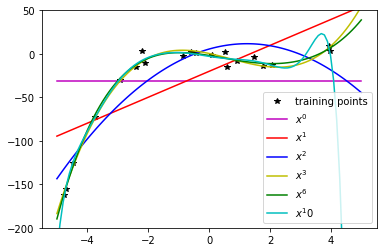

In [7]:
#plotting the polynomials
plt.figure()
plt.plot(x_train, y_train, 'k*')
plt.plot(x, Y0, 'm')
plt.plot(x, Y1, 'r')
plt.plot(x, Y2, 'b')
plt.plot(x, Y3, 'y')
plt.plot(x, Y6, 'g')
plt.plot(x, Y10, 'c')

plt.legend(('training points', '$x^0$','$x^1$', '$x^2$', '$x^3$', '$x^6$', '$x^10$'), loc = 'lower right')

#limits the y axis of the graph
plt.ylim(-200, 50)

In [19]:
#Section 1.3
def eval_pol_regression(parameters, x, y, degree):
    
    X = DataMatrix(x, degree)
    Y = X.dot(parameters)
    
    #calculating rmse
    rmse = np.sqrt(np.mean((Y - y)**2))
    return rmse



rmse_1 = eval_pol_regression(coefficients_1, x_train, y_train, 1)
rmse_2 = eval_pol_regression(coefficients_2, x_train, y_train, 2)
rmse_3 = eval_pol_regression(coefficients_3, x_train, y_train, 3)
rmse_6 = eval_pol_regression(coefficients_6, x_train, y_train, 6)
rmse_10 = eval_pol_regression(coefficients_10, x_train, y_train, 10)

rmse_1, rmse_2, rmse_3, rmse_6, rmse_10

(35.02106539156851,
 20.98141944608093,
 5.254699562089331,
 4.742478602104725,
 4.298818412248267)

In [20]:
from sklearn.model_selection import train_test_split as tts

#splitting the dataset into train and test 
x_train_70, x_test, y_train_70, y_test = tts(x_train, y_train, test_size=0.3) 


#re-calculating the polynomial coefficients
coefficients_1_2 = pol_regression(x_train_70, y_train_70, 1)

coefficients_2_2 = pol_regression(x_train_70, y_train_70, 2)

coefficients_3_2 = pol_regression(x_train_70, y_train_70, 3)

coefficients_6_2 = pol_regression(x_train_70, y_train_70, 6)

coefficients_10_2 = pol_regression(x_train_70, y_train_70, 10)

#calculating train and test rmse for each degree
train_rmse_1 = eval_pol_regression(coefficients_1_2, x_train_70, y_train_70, 1)
test_rmse_1 = eval_pol_regression(coefficients_1_2, x_test, y_test, 1)
train_rmse_2 = eval_pol_regression(coefficients_2_2, x_train_70, y_train_70, 2)
test_rmse_2 = eval_pol_regression(coefficients_2_2, x_test, y_test, 2)
train_rmse_3 = eval_pol_regression(coefficients_3_2, x_train_70, y_train_70, 3)
test_rmse_3 = eval_pol_regression(coefficients_3_2, x_test, y_test, 3)
train_rmse_6 = eval_pol_regression(coefficients_6_2, x_train_70, y_train_70, 6)
test_rmse_6 = eval_pol_regression(coefficients_6_2, x_test, y_test, 6)
train_rmse_10 = eval_pol_regression(coefficients_10_2, x_train_70, y_train_70, 10)
test_rmse_10 = eval_pol_regression(coefficients_10_2, x_test, y_test, 10)

Text(0, 0.5, 'rmse')

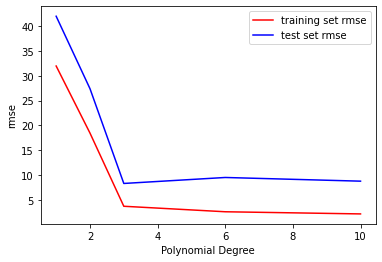

In [23]:
#building arrays to plot the data 
rmse_graph_x = [1,2,3,6,10]
rmse_graph_train = [train_rmse_1,train_rmse_2,train_rmse_3,train_rmse_6,train_rmse_10]
rmse_graph_test = [test_rmse_1,test_rmse_2,test_rmse_3,test_rmse_6,test_rmse_10]

#plotting the data
plt.plot(rmse_graph_x, rmse_graph_train, 'r')
plt.plot(rmse_graph_x, rmse_graph_test, 'b')
plt.legend(('training set rmse','test set rmse'), loc = 'upper right')
plt.xlabel("Polynomial Degree")
plt.ylabel("rmse")

In [2]:
#Section 2.1
from copy import deepcopy as dc


def compute_euclidean_distance(vec_1, vec_2, a=1):
    
    #compute euclidean distance
    distance = np.linalg.norm(vec_1 - vec_2, axis=a)
    return distance

def  initialise_centroids(dataset, k):    
    
    #initialising 4 set of centroids using random numbers
    a = np.random.randint(0, np.max(dataset), size = k)
    b = np.random.randint(0, np.max(dataset), size = k)
    c = np.random.randint(0, np.max(dataset), size = k)
    d = np.random.randint(0, np.max(dataset), size = k)
    
    #zipping the  centroids into a 2D array
    centroids = np.array(list(zip(a, b, c, d)), dtype=np.float32)
    return centroids

def kmeans(dataset, k):
    
    centroids = initialise_centroids(dataset, k)
    centroids_old = np.zeros(centroids.shape)
    cluster_assigned = np.zeros(len(dataset))
    
    #computes the error of the new centroids and the previous ones
    error = compute_euclidean_distance(centroids, centroids_old, None)

    while error != 0:
        
        #assigns each point to a cluster
        for i in range(len(dataset)):
            distances = compute_euclidean_distance(dataset[i], centroids)
            cluster = np.argmin(distances)
            cluster_assigned[i] = cluster
        
        #copies the old centroids
        centroids_old = dc(centroids)
        
        #finding the new centroids by computing the mean of the points in the cluster
        for i in range(k):
            points = [dataset[j] for j in range(len(dataset)) if cluster_assigned[j] == i]
            centroids[i] = np.mean(points, axis=0)
            
        error = compute_euclidean_distance(centroids, centroids_old, None)
        
    return centroids, cluster_assigned

In [3]:
#Section 2 - Data Preparation

km_data_pd = pd.read_csv("Task2 - dataset - dog_breeds.csv")

height = km_data_pd['height'].values
tLength = km_data_pd['tail length'].values
lLength = km_data_pd['leg length'].values
nCirc = km_data_pd['nose circumference'].values

km_data = np.array(list(zip(height, tLength, lLength, nCirc)))
km_data_pd, km_data

(     height  tail length  leg length  nose circumference
 0     5.151        3.535       1.414               0.202
 1     4.949        3.030       1.414               0.202
 2     4.747        3.232       1.313               0.202
 3     4.646        3.131       1.515               0.202
 4     5.050        3.636       1.414               0.202
 ..      ...          ...         ...                 ...
 295   6.834        3.060       5.304               2.346
 296   6.426        2.550       5.100               1.938
 297   6.630        3.060       5.304               2.040
 298   6.324        3.468       5.508               2.346
 299   6.018        3.060       5.202               1.836
 
 [300 rows x 4 columns],
 array([[5.151, 3.535, 1.414, 0.202],
        [4.949, 3.03 , 1.414, 0.202],
        [4.747, 3.232, 1.313, 0.202],
        ...,
        [6.63 , 3.06 , 5.304, 2.04 ],
        [6.324, 3.468, 5.508, 2.346],
        [6.018, 3.06 , 5.202, 1.836]]))

In [4]:
#Section 2.2

centroids_k2 , clusters_k2 = kmeans(km_data, 2)
centroids_k2 , clusters_k2

(array([[5.080745  , 3.4203584 , 1.583783  , 0.29492453],
        [6.3955464 , 2.9298968 , 5.0331445 , 1.7213144 ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.,

Text(0, 0.5, 'Tail Lenght')

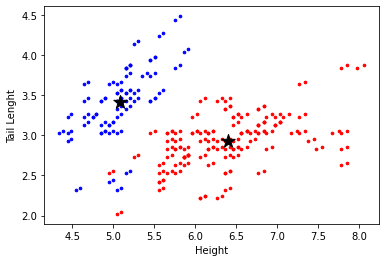

In [5]:
colors = ['b','r','g']

plt.plot()
i=0
for cluster in clusters_k2:
    plt.scatter(height[i], tLength[i], s=7, c=colors[int(cluster)])
    i+=1
plt.scatter(centroids_k2[:, 0], centroids_k2[:, 1], marker='*', s=200, c='k')
plt.xlabel("Height")
plt.ylabel("Tail Lenght")

Text(0, 0.5, 'Leg Lenght')

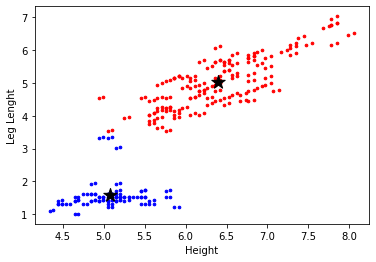

In [6]:
plt.plot()
i=0
for cluster in clusters_k2:
    plt.scatter(height[i], lLength[i], s=7, c=colors[int(cluster)])
    i+=1
plt.scatter(centroids_k2[:, 0], centroids_k2[:, 2], marker='*', s=200, c='k')
plt.xlabel("Height")
plt.ylabel("Leg Lenght")

In [13]:
centroids_k3 , clusters_k3 = kmeans(km_data, 3)
centroids_k3 , clusters_k3

(array([[5.08109  , 3.47942  , 1.48393  , 0.24969  ],
        [5.9807887, 2.785756 , 4.456732 , 1.4556016],
        [6.9551816, 3.1216624, 5.814805 , 2.0933635]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
        2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2.,
        1., 2., 1., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1., 2., 2.,
        2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

Text(0, 0.5, 'Tail Lenght')

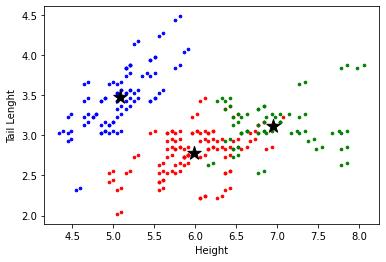

In [14]:
colors = ['b','r','g']

plt.plot()
i=0
for cluster in clusters_k3:
    plt.scatter(height[i], tLength[i], s=7, c=colors[int(cluster)])
    i+=1
plt.scatter(centroids_k3[:, 0], centroids_k3[:, 1], marker='*', s=200, c='k')
plt.xlabel("Height")
plt.ylabel("Tail Lenght")

Text(0, 0.5, 'Leg Lenght')

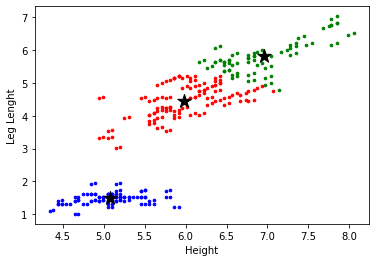

In [15]:
plt.plot()
i=0
for cluster in clusters_k3:
    plt.scatter(height[i], lLength[i], s=7, c=colors[int(cluster)])
    i+=1
plt.scatter(centroids_k3[:, 0], centroids_k3[:, 2], marker='*', s=200, c='k')
plt.xlabel("Height")
plt.ylabel("Leg Lenght")

In [6]:
#Section 3

#Data loading
hiv_data = pd.read_csv("Task3 - dataset - HIV RVG.csv")
hiv_data

,Image number,Bifurcation number,Artery (1)/ Vein (2),Alpha,Beta,Lambda,Lambda1,Lambda2,Participant Condition
0,1,1,1,0.600099,2.141185,0.774660,1.156788,0.896118,Patient
1,1,2,1,0.822612,1.835858,0.906980,1.003627,0.910269,Patient
2,1,3,1,0.862658,1.770032,0.928794,0.974819,0.905406,Patient
3,1,4,1,0.807950,1.373153,0.898860,0.871498,0.783355,Patient
4,1,5,1,0.742544,1.332164,0.861710,0.874353,0.753439,Patient
...,...,...,...,...,...,...,...,...,...
3209,203,3,2,0.180108,1.133420,0.424391,0.980019,0.415912,Patient
3210,203,4,2,0.791547,1.386333,0.889690,0.879670,0.782633,Patient
3211,203,5,2,0.232715,1.190652,0.482406,0.982791,0.474104,Patient
3212,203,6,2,0.746027,1.183473,0.863729,0.823292,0.711101,Patient


In [8]:
#Data Summary
print(hiv_data.describe())

       Image number  Bifurcation number  Artery (1)/ Vein (2)        Alpha  \
count   3214.000000         3214.000000           3214.000000  3214.000000   
mean     107.355009            6.220597              1.573118     0.615305   
std       58.933207            4.103341              0.494702     0.265245   
min        1.000000            1.000000              1.000000     0.092770   
25%       59.000000            3.000000              1.000000     0.402405   
50%      109.000000            5.000000              2.000000     0.620978   
75%      159.000000            9.000000              2.000000     0.809738   
max      203.000000           25.000000              2.000000     2.356406   

              Beta       Lambda      Lambda1      Lambda2  
count  3214.000000  3214.000000  3214.000000  3214.000000  
mean      1.556093     0.765141     0.981465     0.741929  
std       0.387726     0.172840     0.130492     0.159205  
min       0.283299     0.304582     0.390920     0.309526

<AxesSubplot:title={'center':'Alpha'}, xlabel='Participant Condition'>

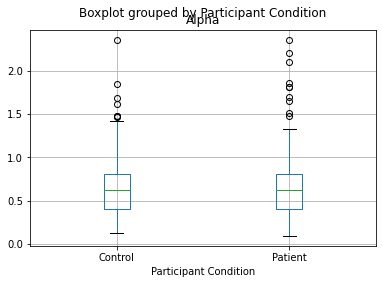

In [23]:
#Boxplot
hiv_data.boxplot(by='Participant Condition',column=['Alpha'])

<AxesSubplot:ylabel='Density'>

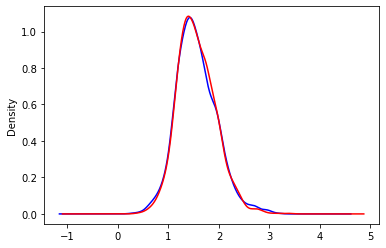

In [36]:
hiv_data_patient = hiv_data.loc[hiv_data['Participant Condition'] == "Patient"]
hiv_data_control = hiv_data.loc[hiv_data['Participant Condition'] == "Control"]

hiv_data_patient['Beta'].plot.density(color='blue')
hiv_data_control['Beta'].plot.density(color='red')

In [13]:
#Data Splits
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(hiv_data,test_size=0.1) 
train, test

ValueError: not enough values to unpack (expected 4, got 2)

In [14]:
#Task 3.2 - Ramdom Forests Classifications
from sklearn.ensemble import RandomForestClassifier 

#Initialise two RFQs with 1000 trees each and 5 and 10 min_samples_leaf respectively 
clf_2_5 = RandomForestClassifier(n_estimators = 1000, min_samples_leaf = 5)
clf_2_10 = RandomForestClassifier(n_estimators = 1000, min_samples_leaf = 10)

#clf_2_5.fit
